In [44]:
# For Data
import pandas as pd
import numpy as np

#  For Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import missingno as msno
from wordcloud import WordCloud

# For NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


# For Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')
# For Styling
plt.style.use('default')

In [45]:
pd.set_option('display.max_columns', 328)

In [46]:
df = pd.read_csv("data/JIRA_Operation_issue.csv")
df.head()

,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project lead id,Project description,Project url,Priority,Resolution,Assignee,Assignee Id,Reporter,Reporter Id,Creator,Creator Id,Created,Updated,Last Viewed,Resolved,Affects versions,Affects versions.1,Fix versions,Fix versions.1,Fix versions.2,Components,Components.1,Due date,Votes,Labels,Labels.1,Labels.2,Description,Environment,Watchers,Watchers.1,Watchers.2,Watchers.3,Watchers.4,Watchers.5,Watchers.6,Watchers.7,Watchers.8,Watchers.9,Watchers.10,Watchers.11,Watchers.12,Watchers Id,Watchers Id.1,Watchers Id.2,Watchers Id.3,Watchers Id.4,Watchers Id.5,Watchers Id.6,Watchers Id.7,Watchers Id.8,Watchers Id.9,Watchers Id.10,Watchers Id.11,Watchers Id.12,Log Work,Original estimate,Remaining Estimate,Time Spent,Work Ratio,Σ Original Estimate,Σ Remaining Estimate,Σ Time Spent,Security Level,Inward issue link (Blocks),Inward issue link (Blocks).1,Outward issue link (Blocks),Inward issue link (Cloners),Outward issue link (Cloners),Inward issue link (Duplicate),Outward issue link (Duplicate),Inward issue link (Problem/Incident),Outward issue link (Problem/Incident),Outward issue link (Problem/Incident).1,Inward issue link (Relates),Inward issue link (Relates).1,Outward issue link (Relates),Outward issue link (Relates).1,Outward issue link (Relates).2,Attachment,Attachment.1,Attachment.2,Attachment.3,Attachment.4,Attachment.5,Attachment.6,Attachment.7,Attachment.8,Attachment.9,Attachment.10,Attachment.11,Attachment.12,Attachment.13,Attachment.14,Attachment.15,Attachment.16,Attachment.17,Attachment.18,Attachment.19,Attachment.20,Attachment.21,Attachment.22,Attachment.23,Attachment.24,Attachment.25,Attachment.26,Attachment.27,Attachment.28,Attachment.29,Attachment.30,Attachment.31,Custom field (42Q Priority),Custom field (Affected Customer),Custom field (Affected services),Custom field (Anomaly classification),Custom field (Approvals),Custom field (Atlas goals),Custom field (Atlas project),Custom field (Atlas project status),Custom field (Begin Date),Custom field (Benefit-risk analysis),Custom field (Budgetary Estimate),Custom field (Budgetary Estimate Provided),Custom field (CSE Estimate),Custom field (CVE ID),Custom field (Category),Custom field (Category).1,Custom field (Comments),Custom field (Complainant contact information),Custom field (Component),Custom field (Component Version),Custom field (Confidence),Custom field (Configuration item version),Custom field (Corrective actions),Custom field (Cost),Custom field (Customer),Custom field (Customer Request Type),Custom field (Date investigation completed),Custom field (Date received),Custom field (Delivery progress),Custom field (Delivery status),Custom field (Department),Custom field (Department).1,Custom field (Designs ready),Custom field (Dev Priority),Custom field (Development),Custom field (Display in the Release Notes),Custom field (Documents),Custom field (Effort),Custom field (End Date),Custom field (Epic Color),Custom field (Epic Link),Epic Link Summary,Custom field (Epic Name),Custom field (Epic Status),Custom field (Est. Acceptance),Custom field (Expected Status Update),Custom field (Expected behavior),Custom field (External URL),Custom field (Fix Version/s),Custom field (FreshDesk Ticket Number),Custom field (GXP Tagging),Custom field (Hardware),Custom field (Harm),Custom field (Hazard),Custom field (Hazardous situation),Custom field (Hiring department),Custom field (Hiring manager),Custom field (Idea archived),Custom field (Idea archived on),Custom field (Idea short description),Custom field (Impact),Custom field (Impact of change),Custom field (Impact on system),Custom field (Impact score),Custom field (Inputs),Custom field (Insights),Custom field (Interfaces),Custom field (Investigation),Custom field (Issue color),Custom field (Job role),Custom field (Linked issues),Custom field (Locked forms),Custom field (Manufacturer),Custom field (Name of medical device),Custom field (O

In [47]:
df = df[['Issue key', 'Summary', 'Status', 'Project lead', 'Priority', 'Resolution', 'Assignee', 'Reporter', 'Creator', 'Created', 'Resolved', 'Description', 'Custom field ([CHART] Date of First Response)']]
df.head()

,Issue key,Summary,Status,Project lead,Priority,Resolution,Assignee,Reporter,Creator,Created,Resolved,Description,Custom field ([CHART] Date of First Response)
0,MPDI-6377,5718391 - [Prod]| E38 |[Measurement/Activity M...,Resolved,Gustavo Velasquez,Medium,Done,Ivan Gonzalez P,MES Support Freshdesk acct,MES Support Freshdesk acct,04/Jul/24 4:52 PM,16/Jul/24 10:37 AM,"Hello team,\n\nDetails:\nDB: mes_e38_01\nServe...",2024-07-10 16:32:13.622
1,MPDI-6316,Machine Gantt Report V2 - Remove completed SN ...,Closed,Gustavo Velasquez,Medium,Done,Francisco Bianchi,MES Support Freshdesk acct,MES Support Freshdesk acct,11/Jun/24 1:22 PM,17/Jul/24 9:16 AM,"Hello Team,\n\nBelieve a misunderstanding happ...",2024-06-11 18:08:56.152
2,MPDI-6211,[External Non Medical PROD] - Query on MFG Lin...,Closed,Gustavo Velasquez,Medium,Done,Felipe Salinas,MES Support Freshdesk acct,MES Support Freshdesk acct,15/May/24 9:45 AM,04/Jun/24 1:41 PM,Site: Bedford PROD\n\nMESR Server: [42qrpt1.42...,2024-05-29 18:05:31.262
3,MPDI-6168,5672686 - [PROD [S13 MES16] [LABEL-ENGINE] -SC...,Resolved,Gustavo Velasquez,Highest,Done,Abul Humayun [42-Q],MES Support Freshdesk acct,MES Support Freshdesk acct,25/Apr/24 7:20 PM,28/May/24 1:37 AM,"Hello Antonio,\n\nDetails:\nLabel name: Scrap_...",2024-04-26 10:00:13.568
4,MPDI-6154,Issue with split and removal of components com...,Resolved,Gustavo Velasquez,Highest,Done,Juan Lopez [42-Q],Elena Romero,Elena Romero,19/Apr/24 9:49 PM,21/May/24 11:07 AM,NaN,2024-05-17 17:01:04.824


In [48]:
df =df.rename(columns={
    'Custom field ([CHART] Date of First Response)': 'First Response'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Issue key       290 non-null    object
 1   Summary         290 non-null    object
 2   Status          290 non-null    object
 3   Project lead    290 non-null    object
 4   Priority        290 non-null    object
 5   Resolution      281 non-null    object
 6   Assignee        257 non-null    object
 7   Reporter        290 non-null    object
 8   Creator         290 non-null    object
 9   Created         290 non-null    object
 10  Resolved        281 non-null    object
 11  Description     287 non-null    object
 12  First Response  233 non-null    object
dtypes: object(13)
memory usage: 29.6+ KB


In [49]:
df['Created'] = pd.to_datetime(df['Created'])
df['Resolved'] = pd.to_datetime(df['Resolved'])
df['First Response'] = pd.to_datetime(df['First Response'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Issue key       290 non-null    object        
 1   Summary         290 non-null    object        
 2   Status          290 non-null    object        
 3   Project lead    290 non-null    object        
 4   Priority        290 non-null    object        
 5   Resolution      281 non-null    object        
 6   Assignee        257 non-null    object        
 7   Reporter        290 non-null    object        
 8   Creator         290 non-null    object        
 9   Created         290 non-null    datetime64[ns]
 10  Resolved        281 non-null    datetime64[ns]
 11  Description     287 non-null    object        
 12  First Response  233 non-null    datetime64[ns]
dtypes: datetime64[ns](3), object(10)
memory usage: 29.6+ KB


In [50]:
# 计算时间间隔，并转换为分钟
df['response_time_minutes'] = (df['First Response'] - df['Created']).dt.total_seconds() / 60
df.head()

,Issue key,Summary,Status,Project lead,Priority,Resolution,Assignee,Reporter,Creator,Created,Resolved,Description,First Response,response_time_minutes
0,MPDI-6377,5718391 - [Prod]| E38 |[Measurement/Activity M...,Resolved,Gustavo Velasquez,Medium,Done,Ivan Gonzalez P,MES Support Freshdesk acct,MES Support Freshdesk acct,2024-07-04 16:52:00,2024-07-16 10:37:00,"Hello team,\n\nDetails:\nDB: mes_e38_01\nServe...",2024-07-10 16:32:13.622,8620.227033
1,MPDI-6316,Machine Gantt Report V2 - Remove completed SN ...,Closed,Gustavo Velasquez,Medium,Done,Francisco Bianchi,MES Support Freshdesk acct,MES Support Freshdesk acct,2024-06-11 13:22:00,2024-07-17 09:16:00,"Hello Team,\n\nBelieve a misunderstanding happ...",2024-06-11 18:08:56.152,286.935867
2,MPDI-6211,[External Non Medical PROD] - Query on MFG Lin...,Closed,Gustavo Velasquez,Medium,Done,Felipe Salinas,MES Support Freshdesk acct,MES Support Freshdesk acct,2024-05-15 09:45:00,2024-06-04 13:41:00,Site: Bedford PROD\n\nMESR Server: [42qrpt1.42...,2024-05-29 18:05:31.262,20660.521033
3,MPDI-6168,5672686 - [PROD [S13 MES16] [LABEL-ENGINE] -SC...,Resolved,Gustavo Velasquez,Highest,Done,Abul Humayun [42-Q],MES Support Freshdesk acct,MES Support Freshdesk acct,2024-04-25 19:20:00,2024-05-28 01:37:00,"Hello Antonio,\n\nDetails:\nLabel name: Scrap_...",2024-04-26 10:00:13.568,880.226133
4,MPDI-6154,Issue with split and removal of components com...,Resolved,Gustavo Velasquez,Highest,Done,Juan Lopez [42-Q],Elena Romero,Elena Romero,2024-04-19 21:49:00,2024-05-21 11:07:00,NaN,2024-05-17 17:01:04.824,40032.080400


In [54]:
df['response_time_minutes'].describe()

count       233.000000
mean      42828.146733
std      105054.931890
min         241.436700
25%         631.277067
50%        5649.034400
75%       24746.435300
max      899157.920783
Name: response_time_minutes, dtype: float64

In [51]:
time = df.groupby(['Created']).size()
fig = px.line(df, 
              x=time.index, 
              y=time.values, 
              title = 'date of issues',
              template='simple_white')

fig.update_layout(
    xaxis_title = 'Dates',
    yaxis_title = 'Count of Issues',
    font=dict(size=17,family="Times New Roman"),)
fig.show()


In [52]:
reporter = df['Reporter'].value_counts()[:10]
fig = px.bar(x=reporter.index,y=reporter.values,text=reporter.values,
       color = reporter.index, color_discrete_sequence=px.colors.sequential.deep,
        title = 'Distribution of Top 10 Reporter',
        template = 'simple_white')

fig.update_traces(textposition='inside',
                  textfont_size=11)

fig.update_layout(
    xaxis_title = 'Reporter',
    yaxis_title = 'Count of Issue',
    font=dict(size=17,family="Times New Roman"),)

fig.show()

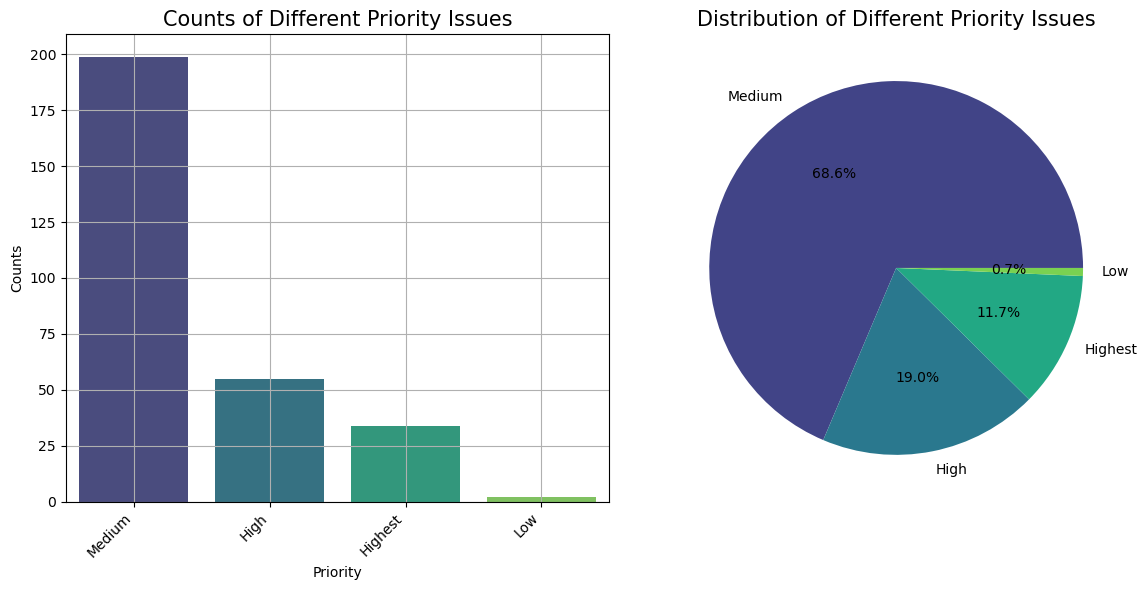

In [53]:
priority_counts = df['Priority'].value_counts().reset_index()
priority_counts.columns = ['Priority', 'Count']
# 使用柱状图展示
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=priority_counts, x='Priority', y='Count', palette='viridis')
plt.title('Counts of Different Priority Issues', fontsize=15)
plt.xlabel('Priority')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# 使用饼图展示
plt.subplot(1, 2, 2)
plt.pie(priority_counts['Count'], labels=priority_counts['Priority'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(priority_counts)))
plt.title('Distribution of Different Priority Issues', fontsize=15)

plt.tight_layout()
plt.show()